# Process for Linear regression 

## Regression Steps
* Annova significance
* R2 Significance
* Adjusted R2 Significance
* Variable significance
* Remove high VIF >5 VIF - variation inflation factor.


## Assumptions about Regressions
* Residuals are normally distributed(Shapiro wilk test used to test).
* Linear relationship between dependent a& independent variable(use scatter plot,correlation between dep & indep)
* Homoscedacity(inverse of hetereoscedacity) or no hetereoscedacity
* No outlier
* No multicollinearity
* Target variable is more driven by high magnitude independent variables/features.To reduce the magnitude use regularization.
------------------------------------------------------------------------------------------------
* Multicollinearity - High correlation between independent variable. It increases standard error.
* Homoscedacity - variance of error = Constant (residual vs predicted chart) cone shape pattern.
* Hetereoscedacity - the variability of a variable is unequal across the range of values of a second variable that predicts it.Cone shape if plot drawn 

### Hetereoscedacity Solution & Find the significant variables
* regularization - reduce the magnitude of the coefficients from model by seeing the plot bar plot model.coef_ 
* Lasso and Ridge are the regularization techniques.
* Lasso uses L1 regularization technique.
* Ridge uses L2 Regularization.
* ElasticNet is the 3rd regularization technique.Hybrid of Lasso and Ridge.Good for bigger dataset.
* 

### Treatment of non linear relationship
* Non Normality - Transform data like boxcox tranformation on dependent variable.it can solve non linearity, non normality, hetereaoscedacity.or log(x),sqrt(x),Exp(x),1/X, Exp(-x)

### Disadvantages of Linear Regression
* Sensitive to outliers
*  mutliple regression suffers Multicollinearity, Auto correlation, Hetereoscedacity.

In [1]:
#Linear regression
#all import statements
import pandas as pd
import numpy as np
#Data visualisation libraries 
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
import os
import seaborn as sns
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
os.chdir('F:\Analytics\github\Linear\data')
train = pd.read_csv('Train_lr.csv')
validation = pd.read_csv('Test_lr.csv')

## Checking out the data

In [3]:
print('----------------------------- Top 5 rows -----------------------------------')
print(train.head())
print('----------------------------Data type object info------------------------------------')
print(train.info())
print('------------------------------Summary statistics of numeric columns----------------------------------')
print(train.describe())
print('---------------------------------Column names-------------------------------')
print(train.columns)
print('--------------------------------Rows and Columns count--------------------------------')
print(train.shape)

----------------------------- Top 5 rows -----------------------------------
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium       

### Viewing data and types
*  Some are text data , some are string data, some are categorical.
* 6818 rows total. some are missing for some columns
* Model does not expect a blank value, either it needs to imputed or the row needs to be removed.

In [4]:
#print(train.head())
print(train.describe()) # this will show summary only for numerix columns

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


### Imputing Missing values

In [5]:
#remove row identifier in training dataset
train = train.drop('Item_Identifier',1)

# impute missing values
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small',inplace=True)
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [7]:
print(train.head())
train_bk = train

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.066132  Fruits and Vegetables   
4         8.93          Low Fat         0.066132              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                         14      Medium   
1   48.2692            OUT018                          4      Medium   
2  141.6180            OUT049                         14      Medium   
3  182.0950            OUT010                         15       Small   
4   53.8614            OUT013                         26        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

### Lets convert the those data into encoded data

In [8]:
# creating dummy variables to convert categorical into numeric values
mylist = list(train.select_dtypes(include=['object']).columns)
print(mylist)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
train.drop(mylist, axis=1, inplace = True)
train.head()
X = pd.concat([train,dummies], axis =1 )

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [9]:
X.head()
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


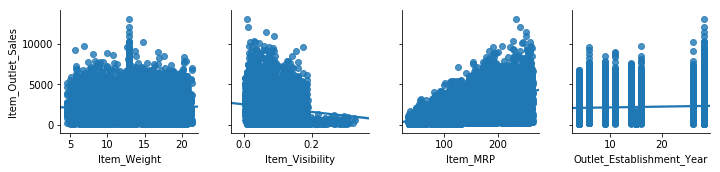

In [10]:
#check for multicollinearity and correlation
sns.pairplot(train_bk, x_vars=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'], y_vars=['Item_Outlet_Sales'], kind='reg')

### There is no correlation between independent variables seen in below corr plots

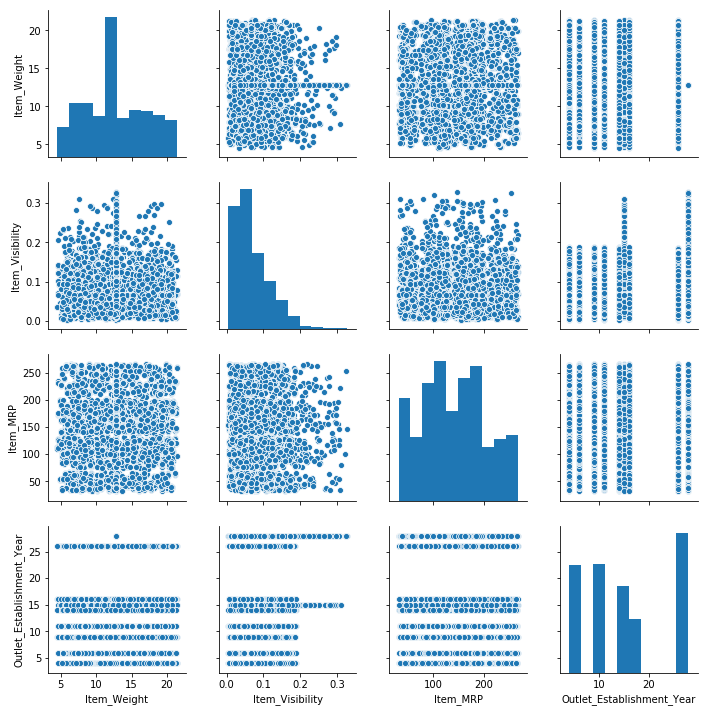

In [14]:
#corr plot
train_bk = train_bk.drop('Item_Outlet_Sales',1)
sns.pairplot(train_bk)

In [12]:
train_bk.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.008301,0.078355,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,0.049135,1.000000


In [15]:
# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Remove the target variabel which we are going to predict

In [16]:
X = train.drop('Item_Outlet_Sales',1)

### Splitting training into train and test

In [17]:
#X = train.loc[:,['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
Y = train.loc[:,['Item_Outlet_Sales']]
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.2, random_state=5)

### Training the model


In [18]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting on validation dataset


In [19]:
pred = lr.predict(x_validation)
preddf=pd.DataFrame.from_records(x_validation)
preddf['Item_Outlet_Sales'] = train['Item_Outlet_Sales']
preddf['pred'] = pd.DataFrame.from_records(pred)
preddf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,pred
0,10.895,0.009614,122.9730,26,3735.1380,2347.946820
1,16.700,0.071335,120.3782,15,443.4228,1851.628054
2,18.600,0.118180,56.2588,16,2097.2700,642.756152
3,20.200,0.066066,61.3510,11,732.3800,898.132124
4,5.785,0.040325,180.4660,26,994.7052,3109.737212


In [20]:
print(lr.intercept_)
print(lr.coef_.ravel())

[182.67618967]
[-3.26521149e+00 -4.74503841e+03  1.54946172e+01  1.31170634e+01]


In [21]:
#print(lr.intercept_)
#print(lr.coef_)

## calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lr.coef_.ravel())
print(lr.intercept_)
print(coeff)

#calculating r-square
lr.score(x_validation,y_validation)

[182.67618967]
                           0  Coefficient Estimate
0                Item_Weight             -3.265211
1            Item_Visibility          -4745.038407
2                   Item_MRP             15.494617
3  Outlet_Establishment_Year             13.117063


0.3424266297294428

### Cost function reduction

In [24]:
from sklearn import metrics

#MAE
print(metrics.mean_absolute_error(y_validation,pred))

#MSE
print(metrics.mean_squared_error(y_validation,pred))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_validation,pred)))

1023.1104748865248
1932727.18159535
1390.2255865849074


Item_Weight                    -3.265211
Item_Visibility             -4745.038407
Item_MRP                       15.494617
Outlet_Establishment_Year      13.117063
dtype: float64


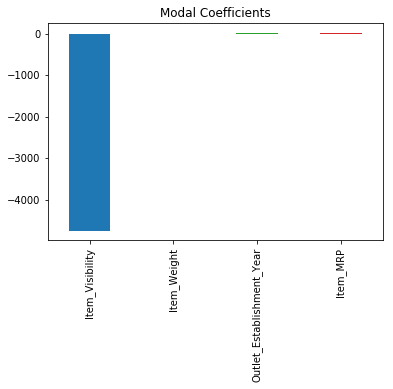

In [41]:
#find the high magnitude coefficients
predictors = x_validation.columns
#predictors
print(Series(lr.coef_.ravel(),predictors.ravel()))
coef = Series(lr.coef_.ravel(),predictors.ravel()).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### Ridge regularization

In [37]:
from sklearn.linear_model import Ridge

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_validation)

In [39]:
#MAE
print(metrics.mean_absolute_error(y_validation,pred))
#MSE
print(metrics.mean_squared_error(y_validation,pred))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_validation,pred)))
#calculating score 
ridgeReg.score(x_validation,y_validation)

1024.9362626798356
1936340.2359673355
1391.5244288072472


0.34119735724702427

Item_Weight                    -2.653943
Item_Visibility             -4511.455329
Item_MRP                       14.755640
Outlet_Establishment_Year      12.380510
dtype: float64


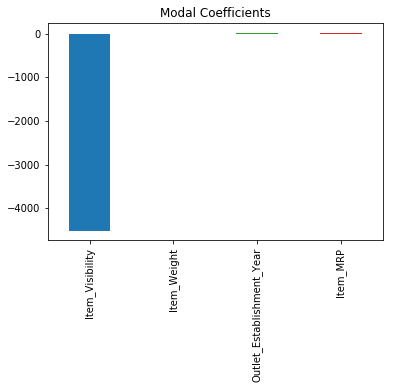

In [44]:
#find the high magnitude coefficients
predictors = x_validation.columns
#predictors
print(Series(ridgeReg.coef_.ravel(),predictors.ravel()))
coef = Series(ridgeReg.coef_.ravel(),predictors.ravel()).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### Lasso regularization

In [62]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_validation)

In [64]:
#MAE
print(metrics.mean_absolute_error(y_validation,pred))
#MSE
print(metrics.mean_squared_error(y_validation,pred))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_validation,pred)))
#calculating score 
ridgeReg.score(x_validation,y_validation)

1024.1128049271238
1934668.3605393267
1390.9235638737762


0.34119735724702427

Item_Weight                    -0.000000
Item_Visibility             -4190.300252
Item_MRP                       15.090111
Outlet_Establishment_Year       9.888924
dtype: float64


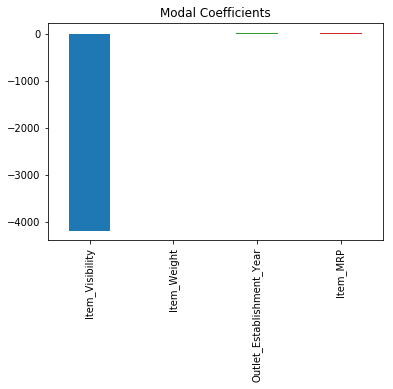

In [65]:
#find the high magnitude coefficients
predictors = x_validation.columns
#predictors
print(Series(lassoReg.coef_.ravel(),predictors.ravel()))
coef = Series(lassoReg.coef_.ravel(),predictors.ravel()).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### ElasticNet regularization
* ElasticNet is the combination Lasso n Ridge.
* This performs better in reducing the magnitude of coefficients.

In [66]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_validation)

In [70]:
#MAE
print(metrics.mean_absolute_error(y_validation,pred_cv))
#MSE
print(metrics.mean_squared_error(y_validation,pred_cv))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_validation,pred_cv)))
#calculating score 
ENreg.score(x_validation,y_validation)

1032.5930935201554
1987754.0664418766
1409.8773231887506


0.323704787107996

Item_Weight                  -2.063561
Item_Visibility             -21.288888
Item_MRP                     15.499427
Outlet_Establishment_Year    10.929088
dtype: float64


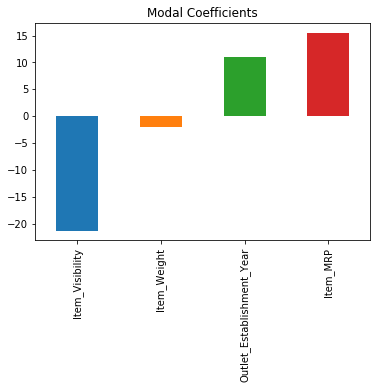

In [71]:
#find the high magnitude coefficients
predictors = x_validation.columns
#predictors
print(Series(ENreg.coef_.ravel(),predictors.ravel()))
coef = Series(ENreg.coef_.ravel(),predictors.ravel()).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [ ]:
help(train_test_split)